In [1]:
#import library
import pandas as pd
import numpy as np
import math
import utils

from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [37]:
#turn data into useful data
df_data_set = pd.read_csv('Data/Realized Vol.csv')
df_data_set['Date'] = pd.to_datetime(df_data_set['Date'])
df_data_set.set_index('Date', inplace=True)
df_data_set.tail(5)

,Realized Volatility
Date,
2023-02-22,0.223816
2023-02-23,0.343995
2023-02-24,0.294861
2023-02-27,0.335694
2023-02-28,0.256646


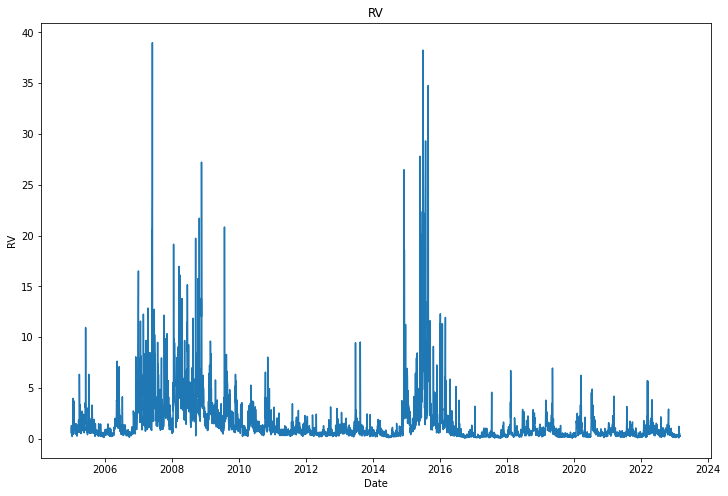

In [5]:
utils.plot_figure(df_data_set['Realized Volatility'], title='RV', xlab='Date', ylab='RV')

In [6]:
#split the data to X and Y

WINDOW_SIZE = 20 ####customize your window sizes here

X, y = utils.df_to_X_y(df_data_set['Realized Volatility'],window_size = WINDOW_SIZE)

In [7]:
#Convert the data into training set, validation set and test set
#The number percentage of each set is 80%, 10% and 10%

#OR CUSTOMIZE YOUR PERCENTAGE OF EACH SET HERE
TRAINING_DATA_LEN = math.ceil(len(X)*0.8)
VALIDATION_LEN = math.ceil(len(X)*0.9)

X_train, y_train, X_val, y_val, X_test, y_test = utils.split_to_training_val_test(X,y,\
    training_len=TRAINING_DATA_LEN, val_len=VALIDATION_LEN)


In [8]:
#check size of each set
X_train.shape, X_test.shape, X_val.shape

((3512, 20, 1), (439, 20, 1), (439, 20, 1))

In [9]:
#built model
model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64, dropout=0.2))
model1.add(Dense(1, 'linear'))

cp1 = ModelCheckpoint('model1/', save_best_only=True) #TAKE ONLY THE BEST MODEL

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.005), \
    metrics=[RootMeanSquaredError()])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [10]:
#start training model
EPOCH = 30  ##SET YOUR EPOCHS HERE
history = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCH, callbacks=[cp1])

Epoch 1/30
110/110 [==============================] - 4s 14ms/step - loss: 5.2373 - root_mean_squared_error: 2.2885 - val_loss: 0.3156 - val_root_mean_squared_error: 0.5618


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 2/30
110/110 [==============================] - 1s 9ms/step - loss: 4.6798 - root_mean_squared_error: 2.1633 - val_loss: 0.3219 - val_root_mean_squared_error: 0.5674
Epoch 3/30
110/110 [==============================] - 1s 11ms/step - loss: 4.5448 - root_mean_squared_error: 2.1319 - val_loss: 0.3262 - val_root_mean_squared_error: 0.5711
Epoch 4/30
110/110 [==============================] - 1s 8ms/step - loss: 4.4777 - root_mean_squared_error: 2.1160 - val_loss: 0.3806 - val_root_mean_squared_error: 0.6169
Epoch 5/30
110/110 [==============================] - 1s 8ms/step - loss: 4.4690 - root_mean_squared_error: 2.1140 - val_loss: 0.3334 - val_root_mean_squared_error: 0.5774
Epoch 6/30
110/110 [==============================] - 1s 9ms/step - loss: 4.3149 - root_mean_squared_error: 2.0772 - val_loss: 0.3478 - val_root_mean_squared_error: 0.5898
Epoch 7/30
110/110 [==============================] - 1s 9ms/step - loss: 4.2426 - root_mean_squared_error: 2.0597 - val_loss: 0.3283 - val

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


Epoch 20/30
110/110 [==============================] - 1s 12ms/step - loss: 4.2447 - root_mean_squared_error: 2.0603 - val_loss: 0.3371 - val_root_mean_squared_error: 0.5806
Epoch 21/30
110/110 [==============================] - 2s 14ms/step - loss: 4.2402 - root_mean_squared_error: 2.0592 - val_loss: 0.3252 - val_root_mean_squared_error: 0.5702
Epoch 22/30
110/110 [==============================] - 1s 11ms/step - loss: 4.1495 - root_mean_squared_error: 2.0370 - val_loss: 0.3156 - val_root_mean_squared_error: 0.5618
Epoch 23/30
110/110 [==============================] - 1s 10ms/step - loss: 4.1274 - root_mean_squared_error: 2.0316 - val_loss: 0.3277 - val_root_mean_squared_error: 0.5724
Epoch 24/30
110/110 [==============================] - 1s 9ms/step - loss: 4.2058 - root_mean_squared_error: 2.0508 - val_loss: 0.3355 - val_root_mean_squared_error: 0.5792
Epoch 25/30
110/110 [==============================] - 1s 9ms/step - loss: 4.1646 - root_mean_squared_error: 2.0407 - val_loss: 0.3

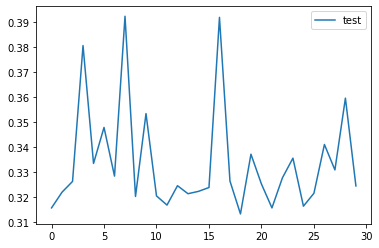

In [11]:
# plot history
#plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [15]:
from tensorflow.keras.models import load_model
#check result for training set
model1 = load_model('model1/')
train_predictions = model1.predict(X_test).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test})

In [24]:
train_results = pd.read_csv('Data/shcmp multi.csv')
train_results['Date'] = pd.to_datetime(train_results['Date'])
train_results.set_index('Date',inplace=True)

train_results['Train Predictions'] = train_predictions

In [36]:
train_results.head(5)

,Realized Volatility,Train Predictions
Date,,
2021-05-11,0.794308,0.607174
2021-05-12,0.480160,0.674691
2021-05-13,0.647137,0.614954
2021-05-14,0.489060,0.615211
2021-05-17,0.423597,0.574857


In [38]:
y_test

array([0.79430825, 0.4801604 , 0.64713671, 0.48905979, 0.42359676,
       0.15238435, 0.21088343, 0.49531448, 0.29012413, 0.3873943 ,
       0.49250559, 0.19860729, 0.56042763, 0.40923771, 0.19857089,
       0.44161522, 0.4956784 , 0.37659463, 0.73633561, 0.3119494 ,
       0.77640777, 0.15781141, 0.39002239, 0.23646436, 0.56216066,
       0.53350614, 0.29786418, 0.48198987, 0.53350185, 0.21053032,
       0.37793986, 0.33000111, 0.36464032, 0.13711143, 0.2697819 ,
       0.23181099, 0.58679774, 0.44834198, 0.24587924, 0.54230829,
       0.3740068 , 0.33895497, 0.41752396, 0.66462371, 0.23990745,
       0.43014668, 0.43975884, 0.28591349, 0.54212874, 0.21365397,
       0.19149996, 0.209313  , 0.42392761, 1.72694904, 1.91119437,
       3.16631944, 0.49189766, 0.64170462, 1.1692745 , 0.65335194,
       0.35959066, 0.54435031, 0.4190654 , 0.52488583, 0.41114091,
       0.32195309, 0.41537987, 0.45452764, 0.37036447, 0.94356892,
       0.757265  , 0.38734836, 0.91321663, 0.32314947, 0.33027

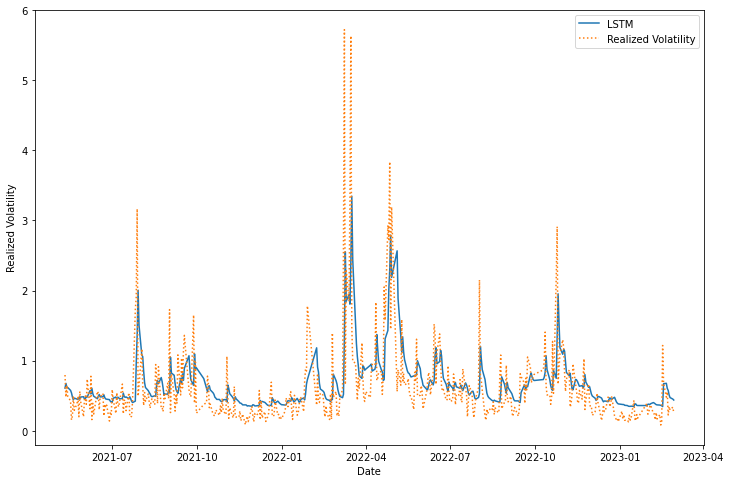

In [35]:
plt.figure(figsize=(12,8))
plt.plot(train_results['Train Predictions'], label='LSTM')
plt.plot(train_results['Realized Volatility'], label='Realized Volatility',linestyle=':')
plt.xlabel('Date')
plt.ylabel('Realized Volatility')
plt.legend()
plt.show()

In [27]:
#show error
Predictions_val = train_results['Train Predictions']
Actual_val = train_results['Realized Volatility']

utils.Predictions_Error(Predictions_val,Actual_val)

MAE =  0.3061619770357525
MSE =  0.2563981703575783
RMSE =  0.5063577493803944
R_2 =  0.3093492334408434
RMSPE =  0.9138734297865677
MSLE =  0.048536269689589455
